# CLIPIT demo

This version of the notebook is setup to easily change the rendering model that draws the image, as well as update other settings before running.

In [ ]:
#@title Setup

#@markdown Please execute this cell by pressing the _Play_ button 
#@markdown on the left. You should only need to run this part once.

#@markdown **Note**: This installs the software on the Colab 
#@markdown notebook in the cloud and not on your computer.

%%capture
!git clone https://github.com/openai/CLIP
# !pip install taming-transformers
!git clone https://github.com/CompVis/taming-transformers.git
!rm -Rf clipit
!git clone -b future https://github.com/dribnet/clipit
!pip install ftfy regex tqdm omegaconf pytorch-lightning
!pip install kornia
!pip install imageio-ffmpeg   
!pip install einops
!pip install torch-optimizer
!pip install easydict
!pip install braceexpand
!pip install git+https://github.com/pvigier/perlin-numpy
!mkdir steps
!mkdir models
!wget https://user-images.githubusercontent.com/945979/126260797-adc60317-9518-40de-8700-b1f93e81e0ec.png -O this_is_fine.png
!wget https://user-images.githubusercontent.com/945979/126415385-d70ff2b0-f021-4238-9621-6180d33b242c.jpg -O perfume.jpg


In [ ]:
#@title Easy Settings

#@markdown Let's take a prompt and try drawing with a number
#@markdown of different models. The models we will be using are
#@markdown VQGAN models which mainly differ on the trained data
#@markdown and architecture. Swapping the model will make the result
#@markdown look differnt. For example: "wikiart" is trained on
#@markdown artwork and so draws things more arty. ¯\\_(ツ)_/¯

#@markdown Best bet: just try different models out and see what happens.

prompts = "a robot by Margaret D. H. Keane" #@param {type:"string"}

vqgan_model = "wikiart_16384" #@param ["imagenet_f16_16384", "imagenet_f16_1024", "openimages_f16_8192", "wikiart_1024", "wikiart_16384", "coco"]

#@markdown When you have the settings you want, press the play button on the left.
#@markdown The system will save these and we can then run it below.

# Simple setup
from clipit import generate
from IPython import display

generate.reset_settings()
generate.add_settings(prompts=prompts, vqgan_model=vqgan_model)


Setting up with notebook settings


## Sneak in some more settings? (optional)

The code block below is a chance to sneak in some last settings before we start the code. For example, you can set the quality to "better" or the aspect to "square". In the other notebooks if you want to sneak in a different vqgan model before drawing, you can do it here by requesting a different vqgan_model settings. This allows us to mix and match the best settings discussed in differnt notebooks.

Make sure you click the play button below *after* running the easy settings above if you want to make any of these modifications before running.

In [ ]:
# lines like this one starting with '#" are comments and do not get run

# here's an example setting: setting the quality to "better" (slower) or "draft" (faster)
generate.add_settings(quality="better")

# this is the example of how to render as a square and run longer. Uncomment the line to apply
# generate.add_settings(aspect="square", iterations=600)

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_wikiart_16384.ckpt


100%|███████████████████████████████████████| 256M/256M [00:08<00:00, 30.8MiB/s]
100%|███████████████████████████████████████| 351M/351M [00:05<00:00, 59.4MiB/s]


Using device: cuda:0
Optimising using: Adam
Using text prompts: ['a robot by Margaret D. H. Keane']
Using seed: 16486651561554895991


/usr/local/lib/python3.7/dist-packages/kornia/utils/helpers.py:96: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  out1, out2 = torch.solve(input.to(dtype), A.to(dtype))


i: 0, loss: 2.73397, losses: 0.943592, 0.91026, 0.880122


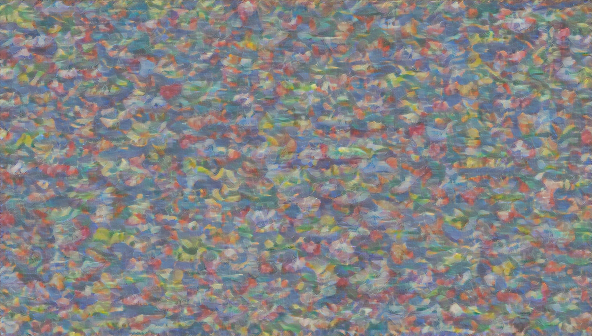

i: 50, loss: 2.29818, losses: 0.830989, 0.728631, 0.738562


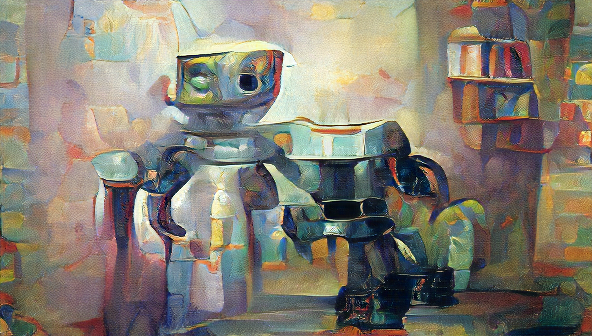

i: 100, loss: 2.2526, losses: 0.817084, 0.707383, 0.728131


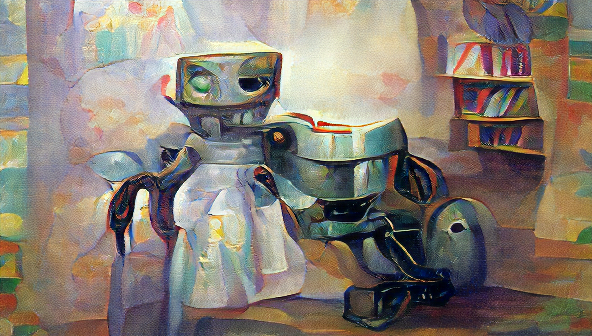

i: 150, loss: 2.20202, losses: 0.798542, 0.691481, 0.712001


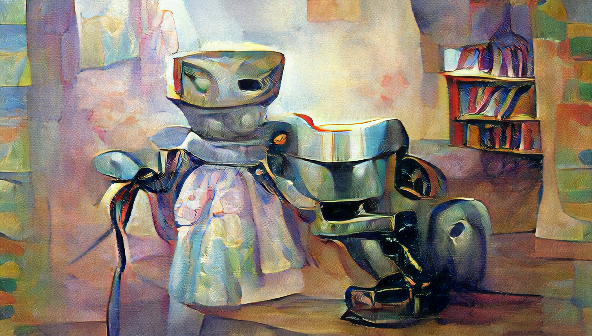

i: 200, loss: 2.1075, losses: 0.755305, 0.663511, 0.688688


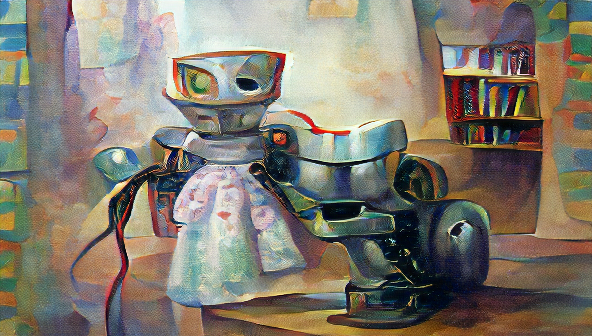

i: 250, loss: 2.21616, losses: 0.801265, 0.699109, 0.715788


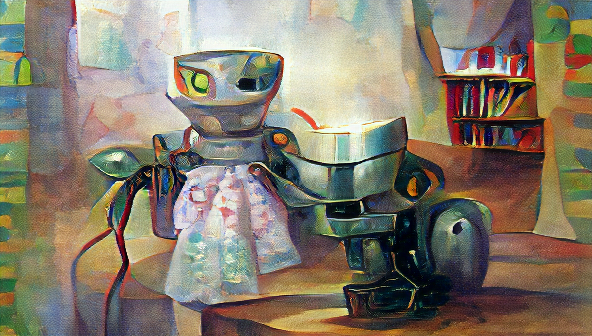

i: 300, loss: 2.22667, losses: 0.809199, 0.699793, 0.717679


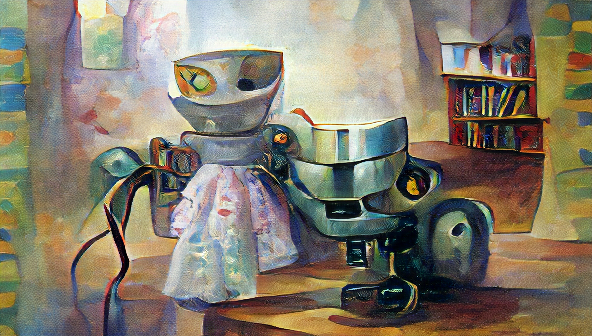

i: 350, loss: 2.18972, losses: 0.791468, 0.690101, 0.708152


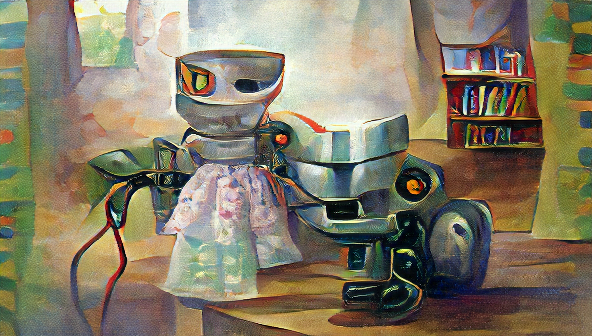

i: 400, loss: 2.18766, losses: 0.79196, 0.687734, 0.707967


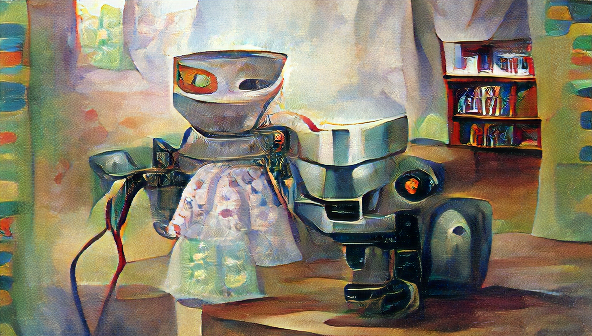

i: 450, loss: 2.19204, losses: 0.796469, 0.685369, 0.710203


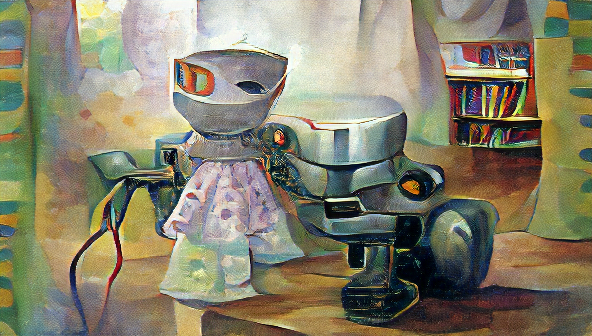

i: 500, loss: 2.17819, losses: 0.791736, 0.686912, 0.699542


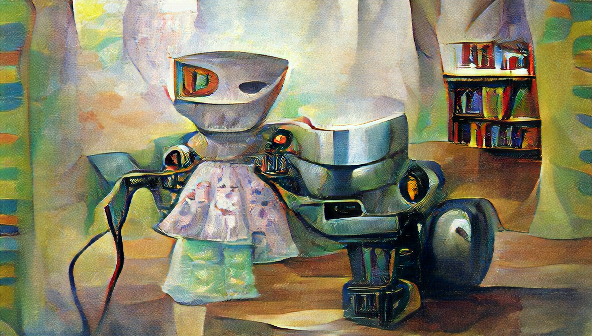

In [ ]:
#@title Now Run

#@markdown Now we'll apply all settings and run.
#@markdown 
#@markdown Click the play button to the left to get this running.
#@markdown 
#@markdown When this is done, you can go above and change the
#@markdown model in the settings and see if you get different results.
#@markdown Note that the first time you run any model it takes a bit
#@markdown longer because the model has to download when needed.

settings = generate.apply_settings()
generate.do_init(settings)

generate.do_run(settings)